# <font color='#2F4F4F'>AfterWork Data Science: Recurrent Neural Networks with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understanding </font>

### a) Specifying the Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### b) Defining the Metric for Success

Build a neural networks regression model with an RSME  less than 10% of the target mean.

### c) Understanding the Context 

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation
* Challenging the Solution


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [238]:
# Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [239]:
# Importing our dataset
train_df = pd.read_csv('https://bit.ly/38dSbSb')
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [240]:
# Sample dataset
train_df.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
670,2014-09-03,57.534,57.599998,56.02,56.237999,56.237999,33861500


In [241]:
# Statistical summary
train_df.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,31.997898,32.558671,31.403696,31.989245,31.989245,2.551310e+07
std,16.911515,17.148543,16.649245,16.903500,16.903500,2.259037e+07
min,5.324000,5.370000,4.528000,4.558000,4.558000,1.824500e+06
25%,8.403000,8.556000,8.197000,8.379500,8.379500,1.059400e+07
50%,39.411000,40.123998,38.709000,39.427000,39.427000,2.007650e+07
75%,45.214499,45.934999,44.303000,45.076502,45.076502,3.245150e+07
max,57.534000,58.284000,56.080002,57.208000,57.208000,1.858195e+08


In [242]:
train_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788000,5.900000,5.530000,5.616000,5.616000,4640500
1,2012-01-04,5.642000,5.734000,5.500000,5.542000,5.542000,3150500
2,2012-01-05,5.552000,5.586000,5.370000,5.424000,5.424000,5027500
3,2012-01-06,5.440000,5.558000,5.282000,5.382000,5.382000,4931500
4,2012-01-09,5.400000,5.498000,5.224000,5.450000,5.450000,4485000
...,...,...,...,...,...,...,...
1253,2016-12-23,41.599998,42.689999,41.542000,42.667999,42.667999,23352500
1254,2016-12-27,42.976002,44.450001,42.883999,43.905998,43.905998,29578500
1255,2016-12-28,44.306000,44.759998,43.439999,43.948002,43.948002,18912500
1256,2016-12-29,43.712002,43.840000,42.824001,42.936001,42.936001,20225000


## <font color='#2F4F4F'>Step 4. Data Preparation</font>

In [243]:
#Using the opening price to predict the stock price in 2017
train_set = train_df.iloc[:, 1:2].values
print(train_set)

[[ 5.788   ]
 [ 5.642   ]
 [ 5.552   ]
 ...
 [44.306   ]
 [43.712002]
 [43.259998]]


In [271]:
# Performing Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled)

[[0.00888719]
 [0.00609079]
 [0.00436698]
 ...
 [0.74663857]
 [0.73526148]
 [0.72660406]]


In [272]:
# Creating a dataset with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(train_df)):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)



In [273]:
# Reshaping 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

In [274]:
# Building the RNN
# Importing the Keras libraries and packages
# ---
#
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [248]:
# Initialising the Recurrent Neural Network

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
# ---
# 'units' is the number of LSTM neurons in the layer
# 'return_sequences' is True as we need to add another LSTM layer after the current one.
# 'input_shape' corresponds to the number of time stamps and the number of indicators.
#  For 'Dropout', 20% of 50 neurons will be ignored randomly during each iteration of training.
# ---
# 
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


# Adding a second LSTM layer and some Dropout regularisation
# ---
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# ---
# 'return_sequences' is False as we will not add more LSTM layers after this one.
# ---
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

# Adding the output layer
# ---
# 'output dimension' is 1 since we are predicting 1 price each time.
# ---
#
regressor.add(Dense(units = 1))

In [249]:
# Compile the RNN 
# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [275]:
# Fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0011 - accuracy: 8.3472e-04
Epoch 2/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0012 - accuracy: 8.3472e-04
Epoch 3/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0011 - accuracy: 8.3472e-04
Epoch 4/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0011 - accuracy: 8.3472e-04
Epoch 5/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0010 - accuracy: 8.3472e-04
Epoch 6/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0011 - accuracy: 8.3472e-04
Epoch 7/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0012 - accuracy: 8.3472e-04
Epoch 8/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0011 - accuracy: 8.3472e-04
Epoch 9/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0012 - accuracy: 8.3472e-04
Epoch 10/100
38/38 [==============================] - 2s 61ms/st

In [276]:
# Making predictions: Getting the predicted stock price
# ---
# Getting the Test Dataset
test_df = pd.read_csv('https://bit.ly/3kW8E0K')
test_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
1,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
3,2020-01-09,99.419998,99.760002,94.573997,96.267998,96.267998,142202000
4,2020-01-10,96.358002,96.987999,94.739998,95.629997,95.629997,64797500


In [279]:
# Getting Test Dataset feature values using the 'Open' price
real_stock_price = test_df.iloc[:, 1:2].values
print(real_stock_price)

# concatenate the train and test datasets for prediction

dataset_total = pd.concat((train_df['Open'],test_df['Open']), axis=0)

# We create the input for prediction, index starting from the 
# date 60 days before the first date in the test dataset.
# ---
#
inputs = dataset_total[len(dataset_total)-len(test_df)-60:].values

# Reshaping the inputs to have only 1 column
# ---
#
inputs = inputs.reshape(-1, 1)


# Using the scale set by the training set to scale the test inputs
# ---
#
inputs = sc.transform(inputs)

# Then creating the test data structure just as we did for the train dataset
# ---
#
X_test = []
y_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test  = np.array(X_test), np.array(y_test)  
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

[[ 88.094002]
 [ 92.279999]
 [ 94.739998]
 [ 99.419998]
 [ 96.358002]
 [ 98.699997]
 [108.851997]
 [105.952003]
 [ 98.75    ]
 [101.522003]
 [106.050003]
 [114.377998]
 [112.849998]
 [114.125999]
 [108.398003]
 [113.697998]
 [115.138   ]
 [126.484001]
 [128.      ]
 [134.738007]
 [176.591995]
 [164.651993]
 [139.983994]
 [146.110001]
 [160.      ]
 [153.757996]
 [155.574005]
 [148.367996]
 [157.444   ]
 [168.320007]
 [184.699997]
 [182.389999]
 [181.395996]
 [167.800003]
 [169.800003]
 [156.5     ]
 [146.      ]
 [125.940002]
 [142.251999]
 [161.      ]
 [152.792007]
 [144.753998]
 [138.      ]
 [121.078003]
 [131.886002]
 [128.039993]
 [116.178001]
 [119.      ]
 [ 93.900002]
 [ 88.001999]
 [ 77.800003]
 [ 74.940002]
 [ 87.639999]
 [ 86.720001]
 [ 95.459999]
 [109.050003]
 [109.477997]
 [101.      ]
 [102.052002]
 [100.25    ]
 [100.800003]
 [ 96.206001]
 [101.900002]
 [102.239998]
 [109.      ]
 [110.839996]
 [112.417999]
 [118.031998]
 [139.794006]
 [148.399994]
 [143.388   ]
 [154.

In [281]:
# Making our Predictions
predicted_stock_price = regressor.predict(X_test)


In [ ]:
# Since we have predicted the scaled values, we reverse them
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)


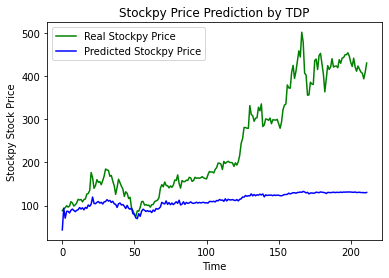

In [283]:
# Visualizing the results
plt.plot(real_stock_price, color='green', label='Real Stockpy Price')
plt.plot(predicted_stock_price, color='blue',
         label='Predicted Stockpy Price')
plt.title('Stockpy Price Prediction by TDP')
plt.xlabel('Time')
plt.ylabel('Stockpy Stock Price')
plt.legend()
plt.show()

In [284]:
# Model Evaluation
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

169.18051434560428


## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

We need to increase the number of parameters for a better prediction. Esp after day 50.

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

#### a) Did we have the right question? Yes


#### b) Did we have the right data? Yes


#### c) What can be done to improve the solution? Train the model more
